In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In [2]:
# model = nn.Sequential(nn.Linear(784,256),
#                       nn.ReLU(),
#                       nn.Linear(256,128),
#                       nn.ReLU(),
#                       nn.Linear(128,64),
#                       nn.ReLU(),
#                       nn.Linear(64,10),
#                       nn.LogSoftmax(dim=1)
#                       )


# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
    
criterion = nn.NLLLoss()
model = Classifier()

In [3]:
from torch import optim
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [4]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST__data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST__data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

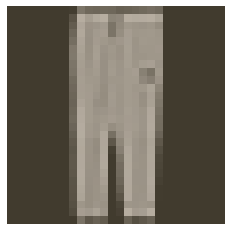

In [5]:
dataiter = iter(testloader)
images,labels=dataiter.next()
helper.imshow(images[0,:]);

In [26]:
epochs = 5
for e in range(epochs):
    running_loss = 0 
    for images,label in trainloader:
        output = model(images.view(images.shape[0],-1))
        loss = criterion(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.2652781388557542
Training loss: 0.25468504397885633
Training loss: 0.25002288993900773
Training loss: 0.25065130612123876
Training loss: 0.24450346509785031


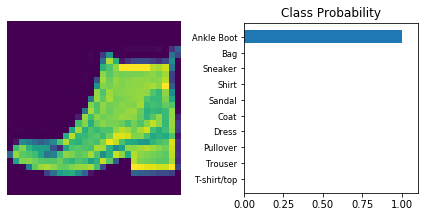

In [17]:
%matplotlib inline
import helper

images,labels = next(iter(testloader))

img = images[0].view(1,784)
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),ps,version='Fashion')

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Inference and Validation

In [18]:
# model = Classifier()
images,labels=next(iter(testloader))
ps=torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [19]:
top_p,top_class=ps.topk(1,dim=1)
print(top_class[:10,:])

tensor([[4],
        [9],
        [3],
        [1],
        [6],
        [4],
        [6],
        [0],
        [7],
        [3]])


In [20]:
equals = top_class == labels.view(*top_class.shape)
# equals

In [21]:
accuracy  = torch.mean(equals.type(torch.FloatTensor))
print("Accuracy:",accuracy.item()*100,"%")

Accuracy: 81.25 %
